In [23]:
import matplotlib.pyplot as plt

In [24]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [25]:
NDX = obb.derivatives.options.chains(symbol="NDX", provider='cboe')
NDX.head()

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,NDXP,21077.5742,NDXP241113C17400000,2024-11-13,0,17400.0,call,0,0,3676.7810,...,0.0,3695.849976,0.0,0.0,0.0000,1.0,0.0,0.0000,0.0002,0.0176
1,NDXP,21077.5742,NDXP241113P17400000,2024-11-13,0,17400.0,put,88,0,0.0077,...,0.0,0.150000,0.0,0.0,5.6548,0.0,0.0,-0.0077,0.0003,0.0000
2,NDXP,21077.5742,NDXP241113C17425000,2024-11-13,0,17425.0,call,0,0,3651.7812,...,0.0,3670.849976,0.0,0.0,0.0000,1.0,0.0,0.0000,0.0004,0.0189
3,NDXP,21077.5742,NDXP241113P17425000,2024-11-13,0,17425.0,put,0,0,0.0079,...,0.0,0.100000,0.0,0.0,5.6147,0.0,0.0,-0.0079,0.0003,0.0000
4,NDXP,21077.5742,NDXP241113C17450000,2024-11-13,0,17450.0,call,0,0,3626.7817,...,0.0,3645.849976,0.0,0.0,0.0000,1.0,0.0,0.0000,0.0003,0.0179


In [26]:
NDX = NDX[NDX['gamma'] * NDX['open_interest'] != 0 ]
NDX

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
572,NDXP,21077.5742,NDXP241113C20720000,2024-11-13,0,20720.0,call,5,15,356.8809,...,263.38,377.949997,-114.55,-0.303082,0.7944,0.9977,0.0001,-0.0802,0.0145,0.0180
573,NDXP,21077.5742,NDXP241113P20720000,2024-11-13,0,20720.0,put,20,66,0.0829,...,0.21,5.050000,-4.84,-0.958416,0.6659,-0.0023,0.0001,-0.0829,0.0145,0.0000
574,NDXP,21077.5742,NDXP241113C20725000,2024-11-13,0,20725.0,call,2,0,351.8811,...,0.00,373.100006,0.00,0.000000,0.7059,0.9976,0.0001,-0.0805,0.0147,0.0178
575,NDXP,21077.5742,NDXP241113P20725000,2024-11-13,0,20725.0,put,18,72,0.0831,...,0.04,5.300000,-5.26,-0.992453,0.6574,-0.0024,0.0001,-0.0831,0.0147,0.0000
577,NDXP,21077.5742,NDXP241113P20730000,2024-11-13,0,20730.0,put,10,91,0.0833,...,0.16,5.500000,-5.34,-0.970909,0.6489,-0.0024,0.0001,-0.0833,0.0149,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20447,NDX,21077.5742,NDX261218P26000000,2026-12-18,765,26000.0,put,1,0,4007.2432,...,0.00,3980.000000,0.00,0.000000,0.1841,-0.6355,0.0001,-0.8364,114.9413,-361.8167
20449,NDX,21077.5742,NDX261218P26500000,2026-12-18,765,26500.0,put,1,0,4319.0156,...,0.00,4292.000000,0.00,0.000000,0.1821,-0.6654,0.0001,-0.7370,111.7966,-381.4703
20451,NDX,21077.5742,NDX261218P27000000,2026-12-18,765,27000.0,put,2,0,4643.9775,...,0.00,4616.000000,0.00,0.000000,0.1801,-0.6943,0.0001,-0.6305,108.0571,-400.9841
20454,NDX,21077.5742,NDX261218C28000000,2026-12-18,765,28000.0,call,4,0,725.7122,...,0.00,742.000000,0.00,0.000000,0.1756,0.2611,0.0001,-1.0257,99.1785,98.6585


In [34]:
NDX['call_gex'] = NDX.apply(lambda row : row['gamma'] * row['open_interest'] * (row['underlying_price'] ** 2) / 100 if row['option_type'] == 'call' else 0 , axis=1)  
NDX['put_gex'] = NDX.apply(lambda row : -row['gamma'] * row['open_interest'] * (row['underlying_price'] ** 2) / 100 if row['option_type'] == 'put' else 0, axis=1)

In [35]:
NDX['net_gex']= NDX['call_gex'] + NDX['put_gex']

In [42]:
# Group by strike price and aggregate GEX values
gex_by_strike = NDX.groupby('strike').agg(
    call_gex=('call_gex', 'sum'),
    put_gex=('put_gex', 'sum'),
    net_gex=('net_gex', 'sum')
).reset_index()


In [43]:
gex_by_strike

,strike,call_gex,put_gex,net_gex
0,17900.0,444.264134,-7108.226147,-6663.962012
1,18000.0,78190.487612,-110621.769405,-32431.281793
2,18100.0,4886.905476,-87964.298563,-83077.393087
3,18200.0,31542.753525,-56865.809172,-25323.055647
4,18225.0,888.528268,-1332.792402,-444.264134
...,...,...,...,...
388,26500.0,2665.584805,-444.264134,2221.320671
389,27000.0,18214.829500,-888.528268,17326.301232
390,27500.0,5775.433744,0.000000,5775.433744
391,28000.0,1777.056537,0.000000,1777.056537


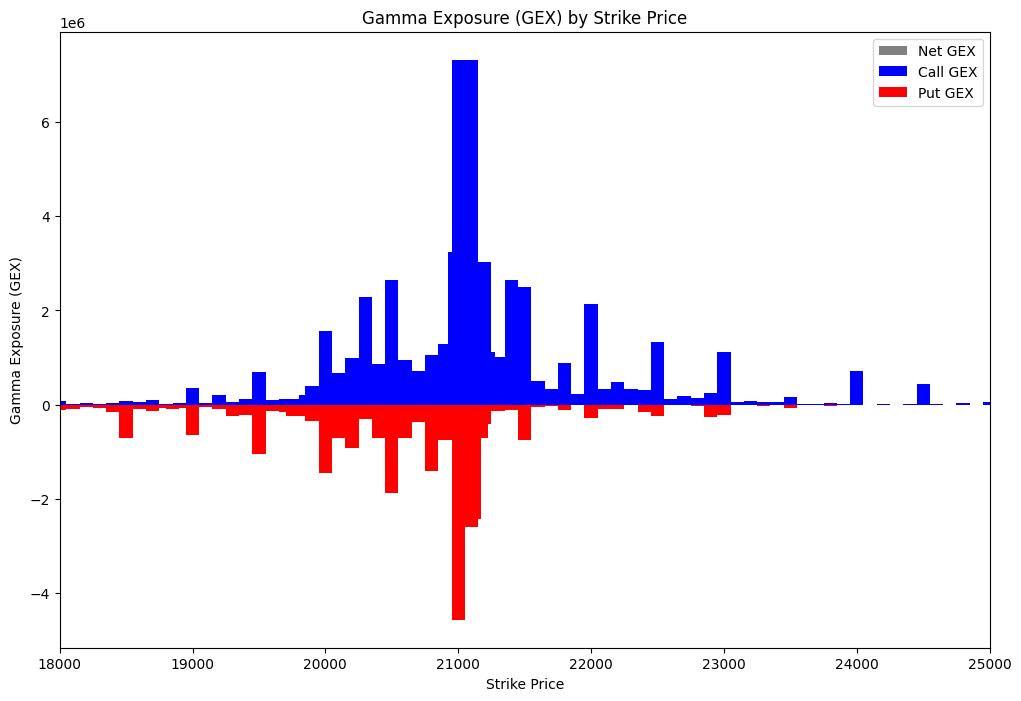

In [ ]:
# Overlay Call and Put GEX
plt.bar(gex_by_strike['strike'], gex_by_strike['call_gex'], color='blue', width=100, label='Call GEX')
plt.bar(gex_by_strike['strike'], gex_by_strike['put_gex'], color='red', width=100, label='Put GEX')
# Set x-axis limits to focus on the range with significant values
plt.xlim([18000, 25000])  # Adjust as necessary based on your data range
plt.xlabel("Strike Price")
plt.ylabel("Gamma Exposure (GEX)")
plt.title("Gamma Exposure (GEX) by Strike Price")
plt.legend()
plt.show()

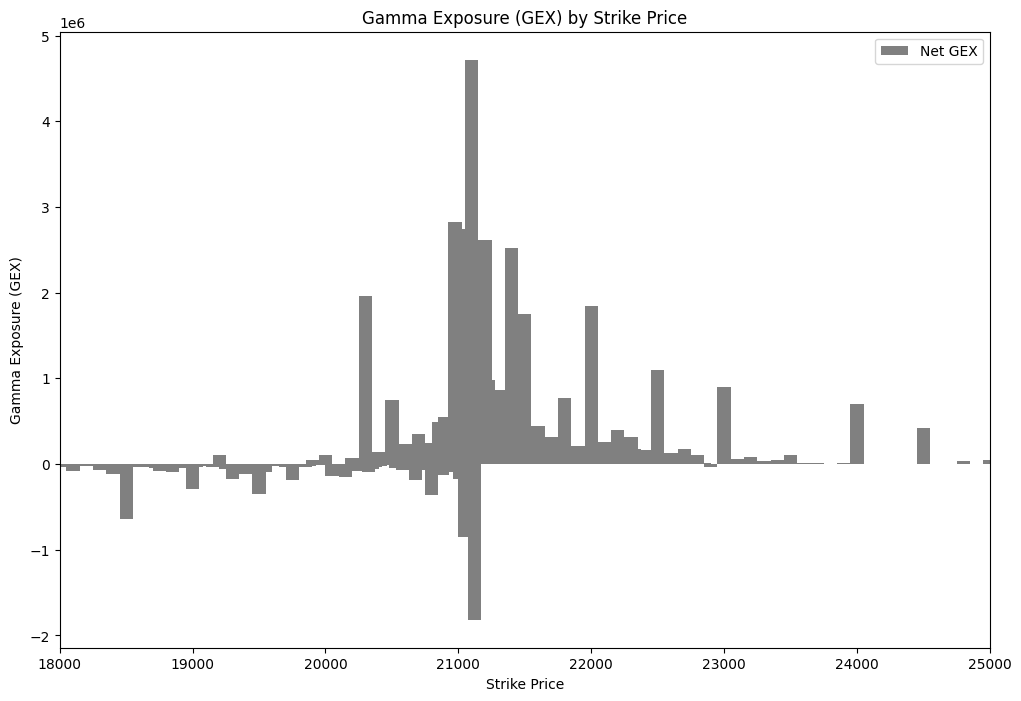

In [49]:
plt.figure(figsize=(12, 8))

# Plot Net GEX
plt.bar(gex_by_strike['strike'], gex_by_strike['net_gex'], color='gray', width=100, label='Net GEX')
# Set x-axis limits to focus on the range with significant values
plt.xlim([18000, 25000])  # Adjust as necessary based on your data range
plt.xlabel("Strike Price")
plt.ylabel("Gamma Exposure (GEX)")
plt.title("Gamma Exposure (GEX) by Strike Price")
plt.legend()
plt.show()